# Logistic Regression - Accident Prediction

# Directory, libraries, data

In [46]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Logistic Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Logistic Regression


In [47]:
# Libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# data 
df = pd.read_csv('accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


# Data Analysis

In [49]:
desc = df.describe().round(2)
desc

,Age,Speed_of_Impact,Survived
count,200.00,197.00,200.0
mean,43.42,70.44,0.5
std,14.94,30.13,0.5
min,18.00,20.00,0.0
25%,31.00,43.00,0.0
50%,43.50,71.00,1.0
75%,56.00,95.00,1.0
max,69.00,119.00,1.0


# Checking for Empty values

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [51]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [52]:
df = df.dropna(subset=['Gender', "Speed_of_Impact"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    object 
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    object 
 4   Seatbelt_Used    196 non-null    object 
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB


# Check for outliers 

<Axes: >

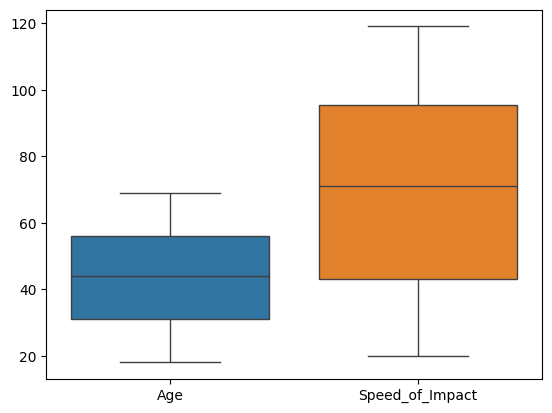

In [54]:
sns.boxplot(df.loc[:, ['Age', 'Speed_of_Impact']])

# Categorical values distribution

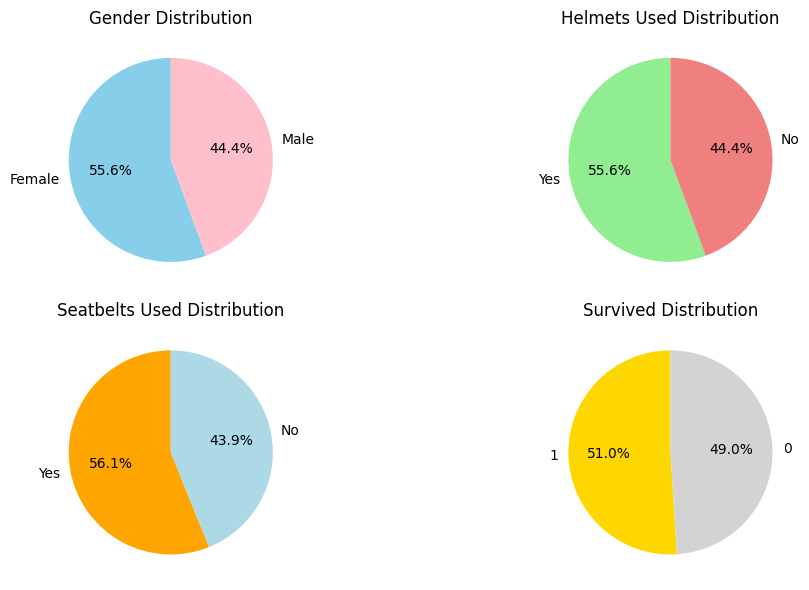

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Gender Distribution
df['Gender'].value_counts().plot.pie(
    ax=axes[0, 0], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_ylabel('')

# Helmet Used
df['Helmet_Used'].value_counts().plot.pie(
    ax=axes[0, 1], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], startangle=90)
axes[0, 1].set_title('Helmets Used Distribution')
axes[0, 1].set_ylabel('')

# Seatbelt Used
df['Seatbelt_Used'].value_counts().plot.pie(
    ax=axes[1, 0], autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
axes[1, 0].set_title('Seatbelts Used Distribution')
axes[1, 0].set_ylabel('')

# Survived
df['Survived'].value_counts().plot.pie(
    ax=axes[1, 1], autopct='%1.1f%%', colors=['gold', 'lightgray'], startangle=90)
axes[1, 1].set_title('Survived Distribution')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


# Survivor statistics 

In [13]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
0,56,27.0,1,0,0,0
1,69,46.0,1,0,0,1
2,46,46.0,0,1,1,1
3,32,117.0,0,1,0,1
4,60,40.0,0,0,1,1


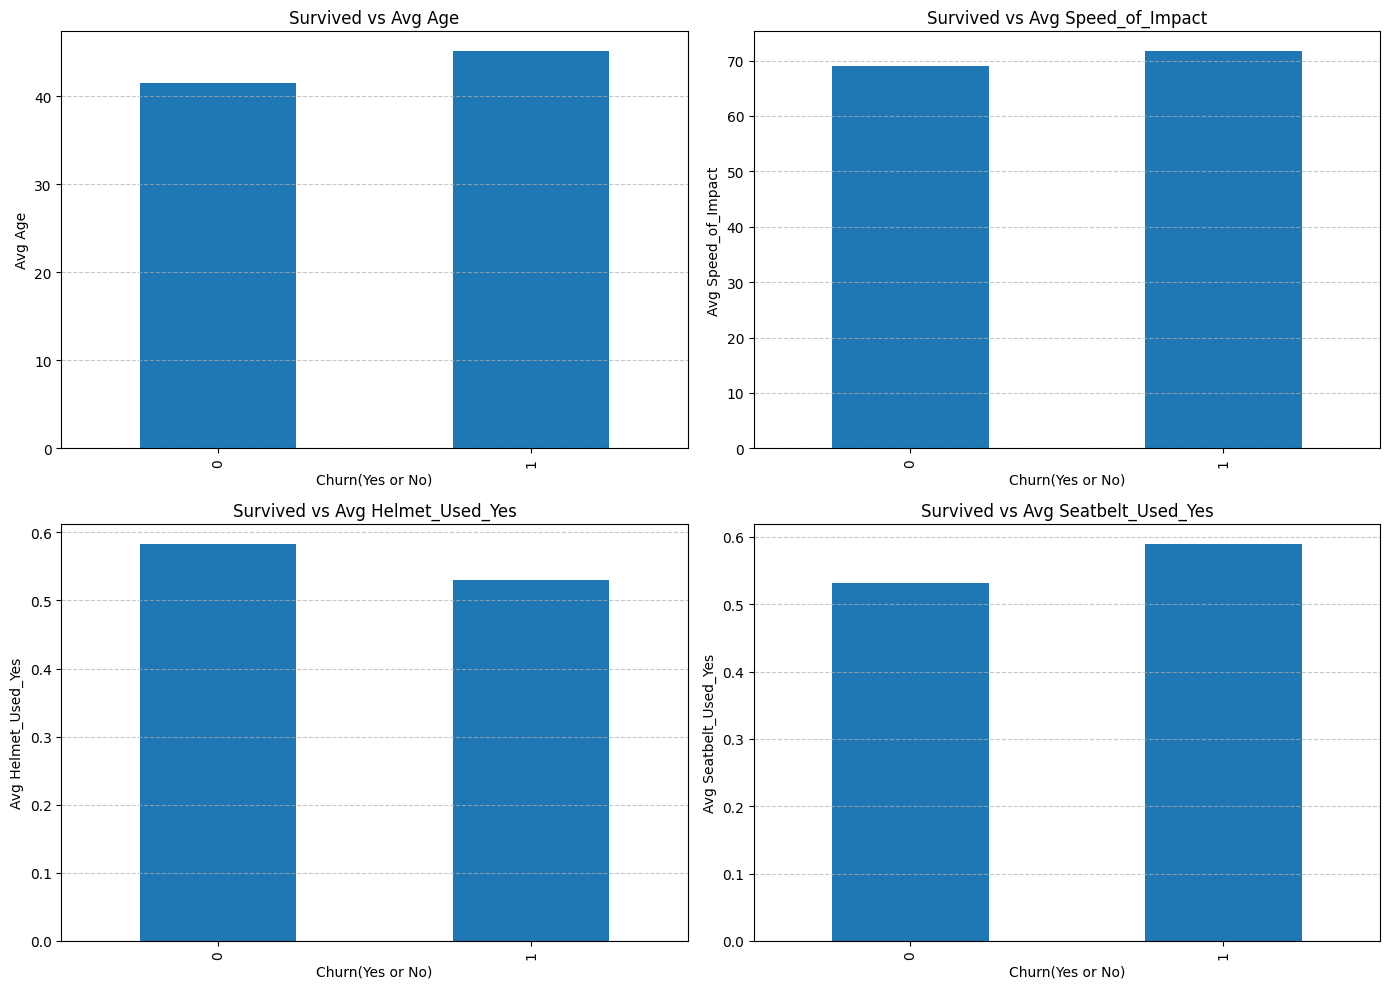

In [31]:
# columns for plot
cols = ["Age", "Speed_of_Impact", "Helmet_Used_Yes", "Seatbelt_Used_Yes"]

num_of_plots = len(cols)
n_cols = 2
n_rows = (num_of_plots + n_cols - 1) // n_cols  # Ensure enough rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy iteration

for i in range(num_of_plots):
    avg_metric = df.groupby("Survived")[cols[i]].mean()
    avg_metric.plot(kind='bar', ax=axs[i])

    axs[i].set_title(f'Survived vs Avg {cols[i]}')
    axs[i].set_xlabel("Churn(Yes or No)")
    axs[i].set_ylabel(f'Avg {cols[i]}')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Correlation Check

<Axes: >

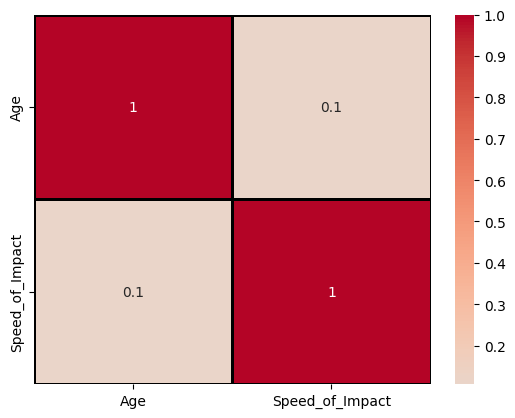

In [32]:
df1 = df.loc[:, ['Age', 'Speed_of_Impact']]
sns.heatmap(df1.corr(),
           annot=True,
           fmt='.1g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black') 

# Logistic Regression Prep

In [33]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head(1)

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
0,56,27.0,1,0,0,0


In [34]:
columns = ['Age', 'Speed_of_Impact', 'Gender_Male', 'Helmet_Used_Yes', 'Seatbelt_Used_Yes', 'Survived']
df = df[columns]
df.head(1)

,Age,Speed_of_Impact,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes,Survived
0,56,27.0,0,0,0,1


## Isolate X and y

In [35]:
# Isolate X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = sm.add_constant(X)
X.head(2)

,const,Age,Speed_of_Impact,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
0,1.0,56,27.0,0,0,0
1,1.0,69,46.0,0,0,1


## Test train Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

## Train the model

In [37]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.677464
         Iterations 4


## Summary 

In [38]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  156
Model:                          Logit   Df Residuals:                      150
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.01514
Time:                        13:19:44   Log-Likelihood:                -105.68
converged:                       True   LL-Null:                       -107.31
Covariance Type:            nonrobust   LLR p-value:                    0.6616
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6618      0.653     -1.013      0.311      -1.942       0.618
Age                   0.0083      0.011      0.755      0.450      -0.013       0.030
Speed_of_Impact       0.

## Assess the model

In [39]:
# Predictions
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
prediction[:2]

array([1, 1])

In [40]:
y_test.mean()  # if < 0.3 then unbalanced

0.35

## Confusion Matrix

In [41]:
# confusion matrix 
print(confusion_matrix(y_test, prediction))
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

[[10 16]
 [ 3 11]]


In [42]:
def logit_eval(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score2 = (2 * tp) / (2 * tp + fp + fn)

    evals = [accuracy, precision, recall, f1_score, f1_score2, specificity]
    evals_str = ['accuracy', 'precision', 'recall(sensitivity)', 'f1_score', 'f1_score2', 'specificity']

    for i in range(len(evals)):
        print(f'Evaluation metric {evals_str[i]}: {round(evals[i] * 100, 2)}%')

In [43]:
logit_eval(tn, fp, fn, tp)

Evaluation metric accuracy: 52.5%
Evaluation metric precision: 40.74%
Evaluation metric recall(sensitivity): 78.57%
Evaluation metric f1_score: 53.66%
Evaluation metric f1_score2: 53.66%
Evaluation metric specificity: 38.46%


# classification report 

In [44]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.38      0.51        26
           1       0.41      0.79      0.54        14

    accuracy                           0.53        40
   macro avg       0.59      0.59      0.52        40
weighted avg       0.64      0.53      0.52        40

